### Intro

SHAP values provide a way to fairly distribute the "contribution" of each feature to the prediction.

<img src="https://shap.readthedocs.io/en/latest/_images/shap_header.png" height=300 width=550>

In [ ]:
# installing

!pip install shap --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.0 MB/s eta 0:00:00


an example of prediction images

<img src="https://drive.google.com/uc?export=view&id=1gipfq0kt6NyvagTqGA1STiNkafRkiV1J" hight=500 width=500>
<img src="https://drive.google.com/uc?export=view&id=1s87fnhmBkU4yMWc22ASmMFjbnBNumXz8" hight=500 width=500>


### Getting Started

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import shap
shap.initjs()

In [ ]:
!pip install ucimlrepo --quiet

In [ ]:
# data

from ucimlrepo import fetch_ucirepo

abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [ ]:
#Create dummy variables
X['sex.M'] = [1 if s == 'M' else 0 for s in X['Sex']]
X['sex.F'] = [1 if s == 'F' else 0 for s in X['Sex']]
X['sex.I'] = [1 if s == 'I' else 0 for s in X['Sex']]
X = X.drop('Sex', axis=1)

In [ ]:
#Train model
model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Get shap values

explainer = shap.Explainer(model)
shap_values = explainer(X)

[17:12:29] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[17:12:30] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


### Plotting

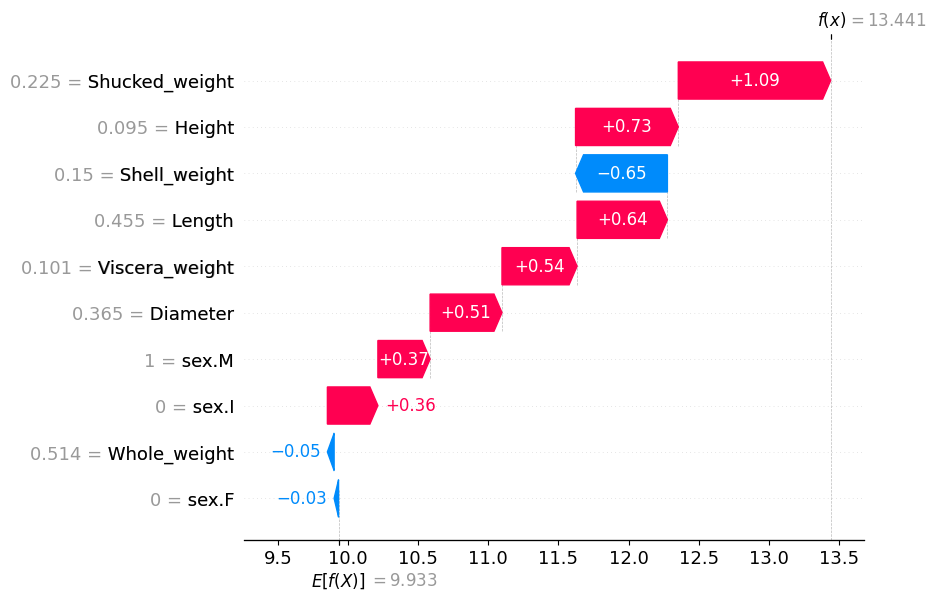

In [ ]:
# waterfall plot for the first data point

shap.plots.waterfall(shap_values[0])

In [ ]:
# stacked force plot for the first data point

shap.initjs()
shap.plots.force(shap_values[0:100])

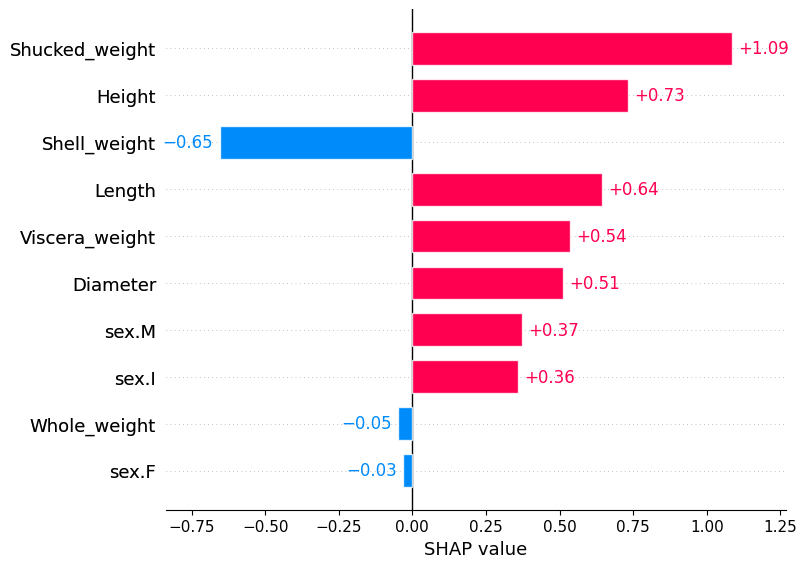

In [ ]:
# mean shap

shap.plots.bar(shap_values[0])

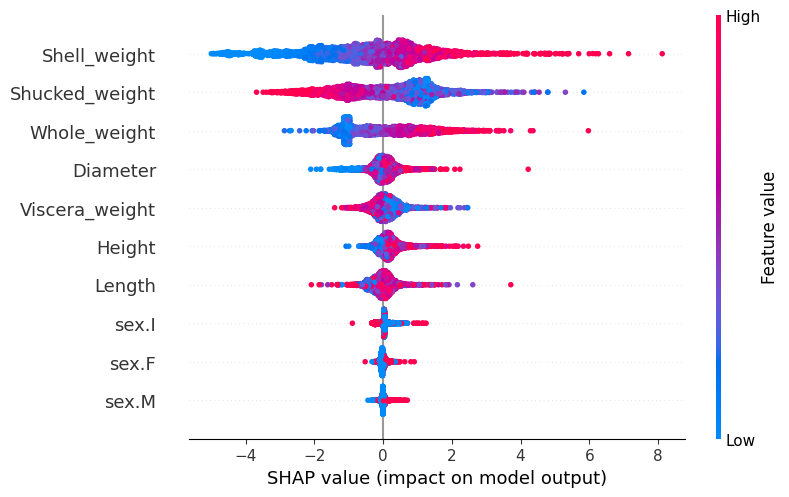

In [ ]:
# beeswarm

shap.plots.beeswarm(shap_values)

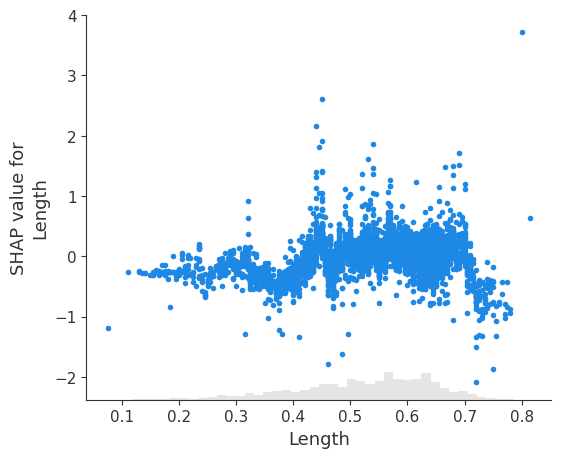

In [ ]:
#Plot 1: shell weight
shap.plots.scatter(shap_values[:,0])

Will continue ...